In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df_poke = pd.read_excel('pokemon_data_tratado.xlsx')
df_poke

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32,0
1031,1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1032,1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1033,1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0


In [155]:
x = df_poke.drop(labels='Is_legendary', axis=1)
y = df_poke['Is_legendary'].values

In [156]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column_name in x:
    column_dtype = x[column_name].dtype
    if column_dtype == 'object':
        x[column_name] = label_encoder.fit_transform(x[column_name])

df_testinho = pd.DataFrame(x)
display(df_testinho)

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,1,91,9,13,318,45,49,49,65,65,45
1,1,2,427,9,13,405,60,62,63,80,80,60
2,2,3,959,9,13,525,80,82,83,100,100,80
3,3,4,118,6,6,309,39,52,43,60,50,65
4,4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,864,10,16,471,109,81,99,66,84,32
1031,1031,628,82,14,7,510,110,83,70,112,70,65
1032,1032,705,815,16,2,452,58,75,83,83,113,40
1033,1033,706,347,16,2,600,80,100,100,110,150,60


In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessador = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['float']))])

x_pre = preprocessador.fit_transform(x)
display(x_pre)

array([[   0,    1,   91, ...,   65,   65,   45],
       [   1,    2,  427, ...,   80,   80,   60],
       [   2,    3,  959, ...,  100,  100,   80],
       ...,
       [1032,  705,  815, ...,   83,  113,   40],
       [1033,  706,  347, ...,  110,  150,   60],
       [1034,  724,  189, ...,   95,   95,   60]], dtype=int64)

In [158]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_pre,y,random_state=300905, test_size=0.3)

In [159]:
from sklearn import tree

classificador_gini = tree.DecisionTreeClassifier(criterion='gini')

classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

[Text(0.5476190476190477, 0.9285714285714286, 'Total <= 562.5\ngini = 0.168\nsamples = 724\nvalue = [657, 67]\nclass = 0'),
 Text(0.30952380952380953, 0.7857142857142857, 'Sp. Atk <= 126.0\ngini = 0.009\nsamples = 644\nvalue = [641, 3]\nclass = 0'),
 Text(0.19047619047619047, 0.6428571428571429, 'Total <= 202.5\ngini = 0.006\nsamples = 636\nvalue = [634, 2]\nclass = 0'),
 Text(0.09523809523809523, 0.5, 'Sp. Atk <= 28.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = 0'),
 Text(0.047619047619047616, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0'),
 Text(0.14285714285714285, 0.35714285714285715, 'Type_1 <= 12.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.09523809523809523, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.19047619047619047, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.2857142857142857, 0.5, 'HP <= 99.0\ngini = 0.003\nsamples = 626\nvalue = [625, 1]\n

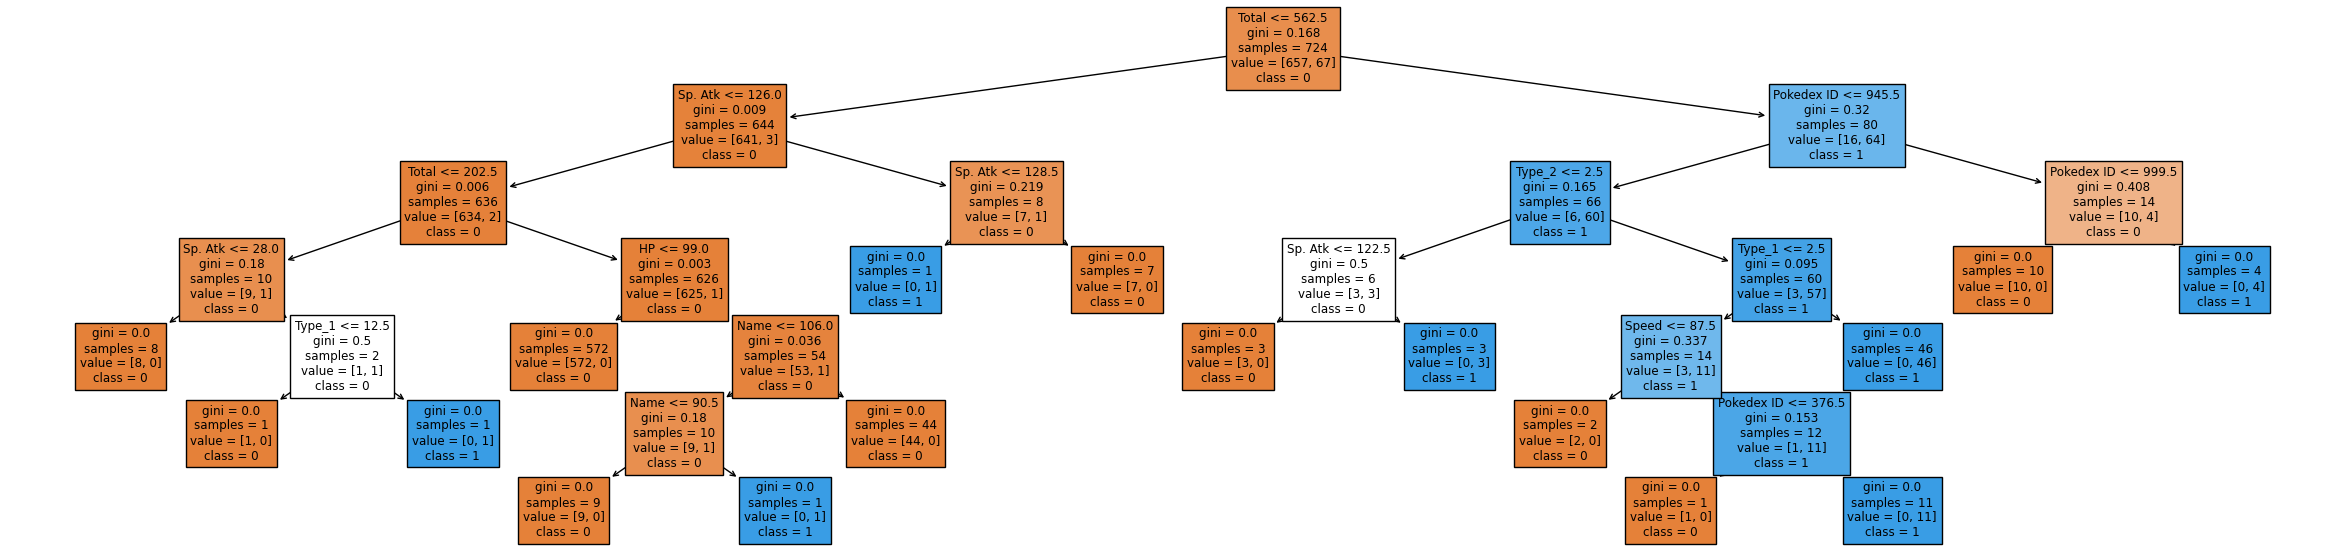

In [160]:
plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_gini,
    feature_names=x.columns.astype(str),
    class_names=classificador_gini.classes_.astype(str),
    filled=True
)

In [161]:
from sklearn.metrics import accuracy_score

resp_treino_gini = classificador_gini.predict(x_treino)

print('Gini:', accuracy_score(y_treino, resp_treino_gini))

Gini: 1.0


<AxesSubplot: >

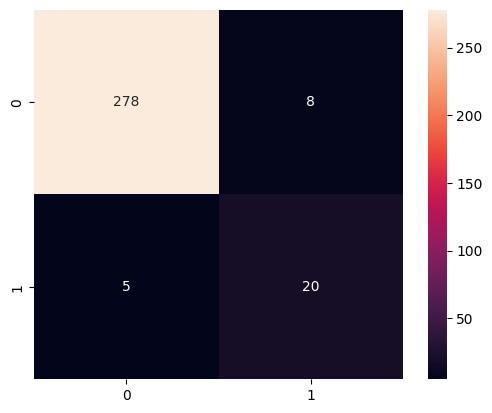

In [162]:
y_pred = classificador_gini.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_gini.classes_, xticklabels = classificador_gini.classes_,fmt = 'd')

In [163]:
path = classificador_gini.cost_complexity_pruning_path(x_treino, y_treino)

ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00091791 0.0013706  0.00253223 0.00267035 0.00359744
 0.00789266 0.01239865 0.12434723]


In [164]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'ccp_alpha': ccp_alphas
}

grid = GridSearchCV(classificador_gini, parametros, cv=5)
grid.fit(x_treino, y_treino)

print(f"Melhor valor de k: {grid.best_params_['ccp_alpha']}")
print(f"Melhor classificador: {grid.best_estimator_}")
print(f"Melhor score (médio): {grid.best_score_*100:.2f}%")

classificador_gini = grid.best_estimator_
classificador_gini.fit(x_treino, y_treino)

Melhor valor de k: 0.0035974384731290825
Melhor classificador: DecisionTreeClassifier(ccp_alpha=0.0035974384731290825)
Melhor score (médio): 98.48%


DecisionTreeClassifier(ccp_alpha=0.0035974384731290825)

[Text(0.3333333333333333, 0.875, 'Total <= 562.5\ngini = 0.168\nsamples = 724\nvalue = [657, 67]\nclass = 0'),
 Text(0.16666666666666666, 0.625, 'gini = 0.009\nsamples = 644\nvalue = [641, 3]\nclass = 0'),
 Text(0.5, 0.625, 'Pokedex ID <= 945.5\ngini = 0.32\nsamples = 80\nvalue = [16, 64]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'gini = 0.165\nsamples = 66\nvalue = [6, 60]\nclass = 1'),
 Text(0.6666666666666666, 0.375, 'Pokedex ID <= 999.5\ngini = 0.408\nsamples = 14\nvalue = [10, 4]\nclass = 0'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1')]

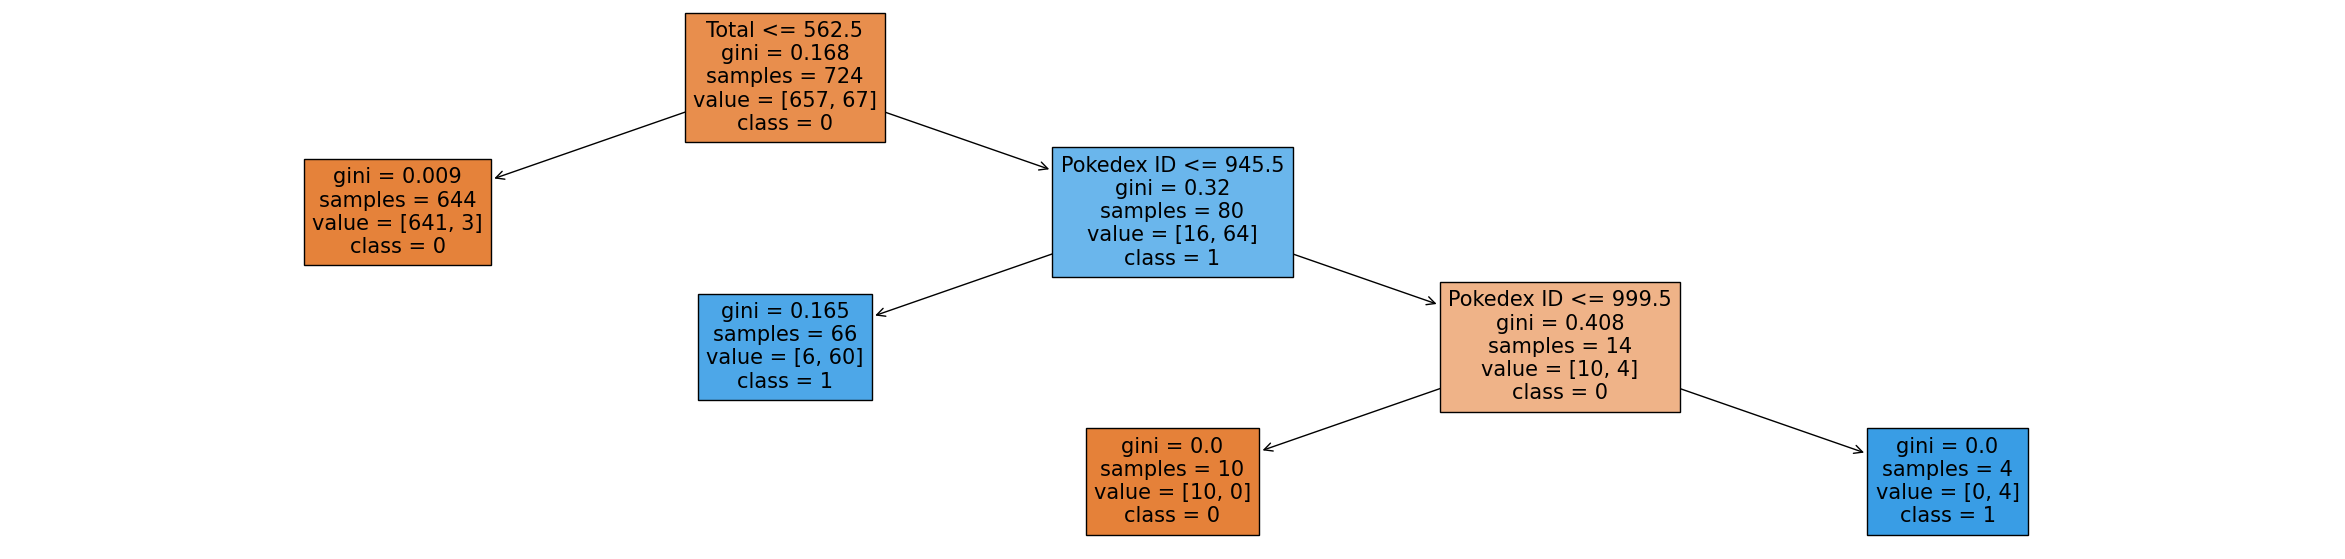

In [165]:
alpha = grid.best_params_['ccp_alpha']

classificador_ccp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
classificador_ccp.fit(x_treino, y_treino)

y_pred = classificador_ccp.predict(x_teste)

plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_ccp,
    feature_names=x.columns.astype(str),
    class_names=classificador_ccp.classes_.astype(str),
    filled=True
)

<AxesSubplot: >

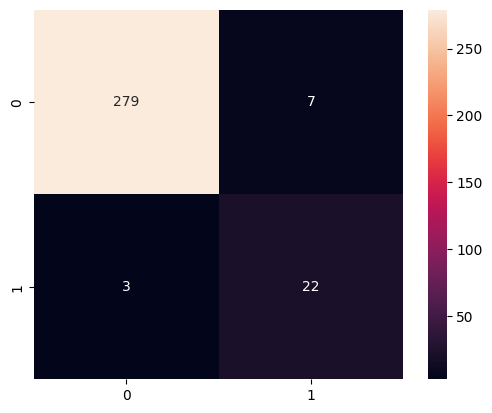

In [166]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_ccp.classes_, xticklabels = classificador_ccp.classes_,fmt = 'd')

In [167]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       286
           1       0.76      0.88      0.81        25

    accuracy                           0.97       311
   macro avg       0.87      0.93      0.90       311
weighted avg       0.97      0.97      0.97       311



In [168]:
import pickle
import hashlib
import hmac
import os
from dotenv import load_dotenv

load_dotenv()

chave = bytes(os.getenv('senha'), 'utf-8')

b'eiceraticate'


In [169]:
def serializar_assinar(modelo, chave, arquivo):    
    modelo_serializado = pickle.dumps(modelo)

    assinatura = hmac.new(chave, modelo_serializado, hashlib.sha256).digest()

    dados_assinados = modelo_serializado + assinatura

    arquivo.write(dados_assinados)
    
with open('modelo_serializado.pickle', 'wb') as arquivo:
    serializar_assinar(classificador_ccp, chave, arquivo)